<a href="https://colab.research.google.com/github/kaamiawan007/pytorch/blob/main/First_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch

In [2]:
import torch.nn as nn
import torch.nn.functional as F


In [3]:
#Creat a Model class that inherits .nn module
class Model(nn.Module):
  def __init__(self,in_feature = 4, h1=8 , h2=9 , out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_feature,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [25]:
torch.manual_seed(32)
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [9]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
# prompt: code to get unique values in teh Variety column

df['variety'].unique()


array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [11]:
# prompt: code to replace (strings to intergers) Setosa with 0.0, Versicolor with 1.0 and Virginica with 2.0

df['variety'].replace(['Setosa', 'Versicolor', 'Virginica'], [0.0, 1.0, 2.0], inplace=True)


In [14]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [15]:
# prompt: Train test splix x and y

X = df.drop('variety',axis=1)
y = df['variety']



In [16]:
# prompt: Covert these to Numpy arrays

import numpy as np
X = np.array(X)
y = np.array(y)


In [18]:
# prompt: train test splict with sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


In [19]:
# prompt: converts x features to float tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [20]:
# prompt: convert y lables to y lables long

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [21]:
# prompt: Set the criterian of model to measure the error, how far of the prediction from

criterion = nn.CrossEntropyLoss()


In [26]:
# prompt: Choose optimizer, adam , epochs lower learning rate

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



In [27]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [28]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    # print everty 10 epochs
    if i%10 == 0:
        print(f'Epoch: {i:} and loss: {loss}')
  #Do some back propogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 10 and loss: 0.9676892161369324
Epoch: 20 and loss: 0.8010899424552917
Epoch: 30 and loss: 0.6541939377784729
Epoch: 40 and loss: 0.44750767946243286
Epoch: 50 and loss: 0.29570281505584717
Epoch: 60 and loss: 0.17932820320129395
Epoch: 70 and loss: 0.10909127444028854
Epoch: 80 and loss: 0.07589396834373474
Epoch: 90 and loss: 0.059610962867736816
Epoch: 100 and loss: 0.05020350590348244


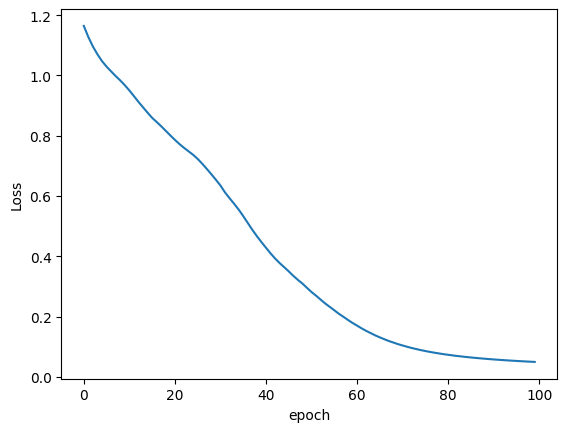

In [30]:
# prompt: Graph it out

import matplotlib.pyplot as plt
plt.plot(range(epochs), [loss.item() for loss in losses]) # Convert tensors to numerical values
plt.ylabel('Loss')
plt.xlabel('epoch');
